In [ ]:
## Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import BertTokenizer,BertForSequenceClassification
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
## Loading validation data
val_data=pd.read_csv('/content/validation.csv')

In [ ]:
## Dimensions of validation data
val_data.shape

(9842, 3)

In [ ]:
## Basic information of data
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9842 entries, 0 to 9841
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   similarity  9842 non-null   int64 
 1   sentence1   9842 non-null   object
 2   sentence2   9842 non-null   object
dtypes: int64(1), object(2)
memory usage: 230.8+ KB


In [ ]:
## First 5 rows of data
val_data.head()

,similarity,sentence1,sentence2
0,1,two women embracing holding go packages,sisters hugging goodbye holding go packages ea...
1,2,two women embracing holding go packages,two woman holding packages
2,0,two women embracing holding go packages,men fighting outside deli
3,2,two young children blue jerseys one number 9 o...,two kids numbered jerseys wash hands
4,1,two young children blue jerseys one number 9 o...,two kids ballgame wash hands


In [ ]:
## Form validation pairs
sent_pairs=[(row['sentence1'],row['sentence2']) for index,row in val_data.iterrows()]
len(sent_pairs)

9842

In [8]:
sent_pairs[1]

('two women embracing holding go packages', 'two woman holding packages')

In [9]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
## Load tokenizer
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
## Tokenization
def tokenization(sent1, sent2):
    encoded = tokenizer.encode_plus(
        sent1,sent2,
        add_special_tokens=True,
        padding=True,
        truncation=True,
        return_tensors='pt'
    )
    input_ids = encoded['input_ids']
    attention_masks = encoded['attention_mask']
    return input_ids, attention_masks

In [ ]:
## Prediction of marks and accuracies/similarities
def predict_score_and_accuracy(sent_pairs,model):
  marks_obtained=[]
  similarities = []
  for sent1, sent2 in sent_pairs:
      input_ids, attention_mask = tokenization(sent1, sent2)
      with torch.no_grad():
          outputs = model(input_ids.to(device), attention_mask.to(device))
          logits = outputs.logits
          mark_obtained = torch.sigmoid(logits)
          accuracy = torch.argmax(logits, dim=1).item()
          if accuracy==0:
            avg_marks=torch.min(mark_obtained).item()
          elif accuracy==1:
            avg_marks=torch.mean(mark_obtained).item()
          elif accuracy==2:
            avg_marks=torch.max(mark_obtained).item()
      similarities.append(accuracy)
      marks_obtained.append(avg_marks)
  return similarities, marks_obtained

In [ ]:
## Load fine-tuned saved models
model1=BertForSequenceClassification.from_pretrained('/content/drive/MyDrive/model11').to(device)
model2=BertForSequenceClassification.from_pretrained('/content/drive/MyDrive/model21').to(device)
model3=BertForSequenceClassification.from_pretrained('/content/drive/MyDrive/model31').to(device)

In [ ]:
## Prediction
sim1,scores1=predict_score_and_accuracy(sent_pairs,model1)

In [ ]:
## Classification report for model1
report1=classification_report(val_data['similarity'],sim1)
rep_lines=report1.split('\n')
rep_lines=rep_lines[2:]
df=[]
for line in rep_lines:
  if line.strip():
    row=line.strip().split()
    df.append({'class':row[0],'precision':row[1],'recall':row[2]})
print('Classifiction Report for Model 1'+'\n',pd.DataFrame(df))

Classifiction Report for Model 1
       class precision recall
0         0      0.88   0.85
1         1      0.81   0.82
2         2      0.86   0.88
3  accuracy      0.85   9842
4     macro       avg   0.85
5  weighted       avg   0.85


In [ ]:
## Prediction
sim2,scores2=predict_score_and_accuracy(sent_pairs,model2)

In [ ]:
## Classification report for model2
report2=classification_report(val_data['similarity'],sim2)
rep_lines=report2.split('\n')
rep_lines=rep_lines[2:]
df=[]
for line in rep_lines:
  if line.strip():
    row=line.strip().split()
    df.append({'class':row[0],'precision':row[1],'recall':row[2]})
print('Classifiction Report for Model 2'+'\n',pd.DataFrame(df))

Classifiction Report for Model 2
       class precision recall
0         0      0.90   0.84
1         1      0.79   0.85
2         2      0.87   0.86
3  accuracy      0.85   9842
4     macro       avg   0.85
5  weighted       avg   0.85


In [ ]:
## Prediction
sim3,scores3=predict_score_and_accuracy(sent_pairs,model3)

In [ ]:
## Classification report for model3
report3=classification_report(val_data['similarity'],sim3)
rep_lines=report3.split('\n')
rep_lines=rep_lines[2:]
df=[]
for line in rep_lines:
  if line.strip():
    row=line.strip().split()
    df.append({'class':row[0],'precision':row[1],'recall':row[2]})
print('Classifiction Report for Model 3'+'\n',pd.DataFrame(df))

Classifiction Report for Model 3
       class precision recall
0         0      0.84   0.87
1         1      0.78   0.81
2         2      0.88   0.83
3  accuracy      0.83   9842
4     macro       avg   0.83
5  weighted       avg   0.83


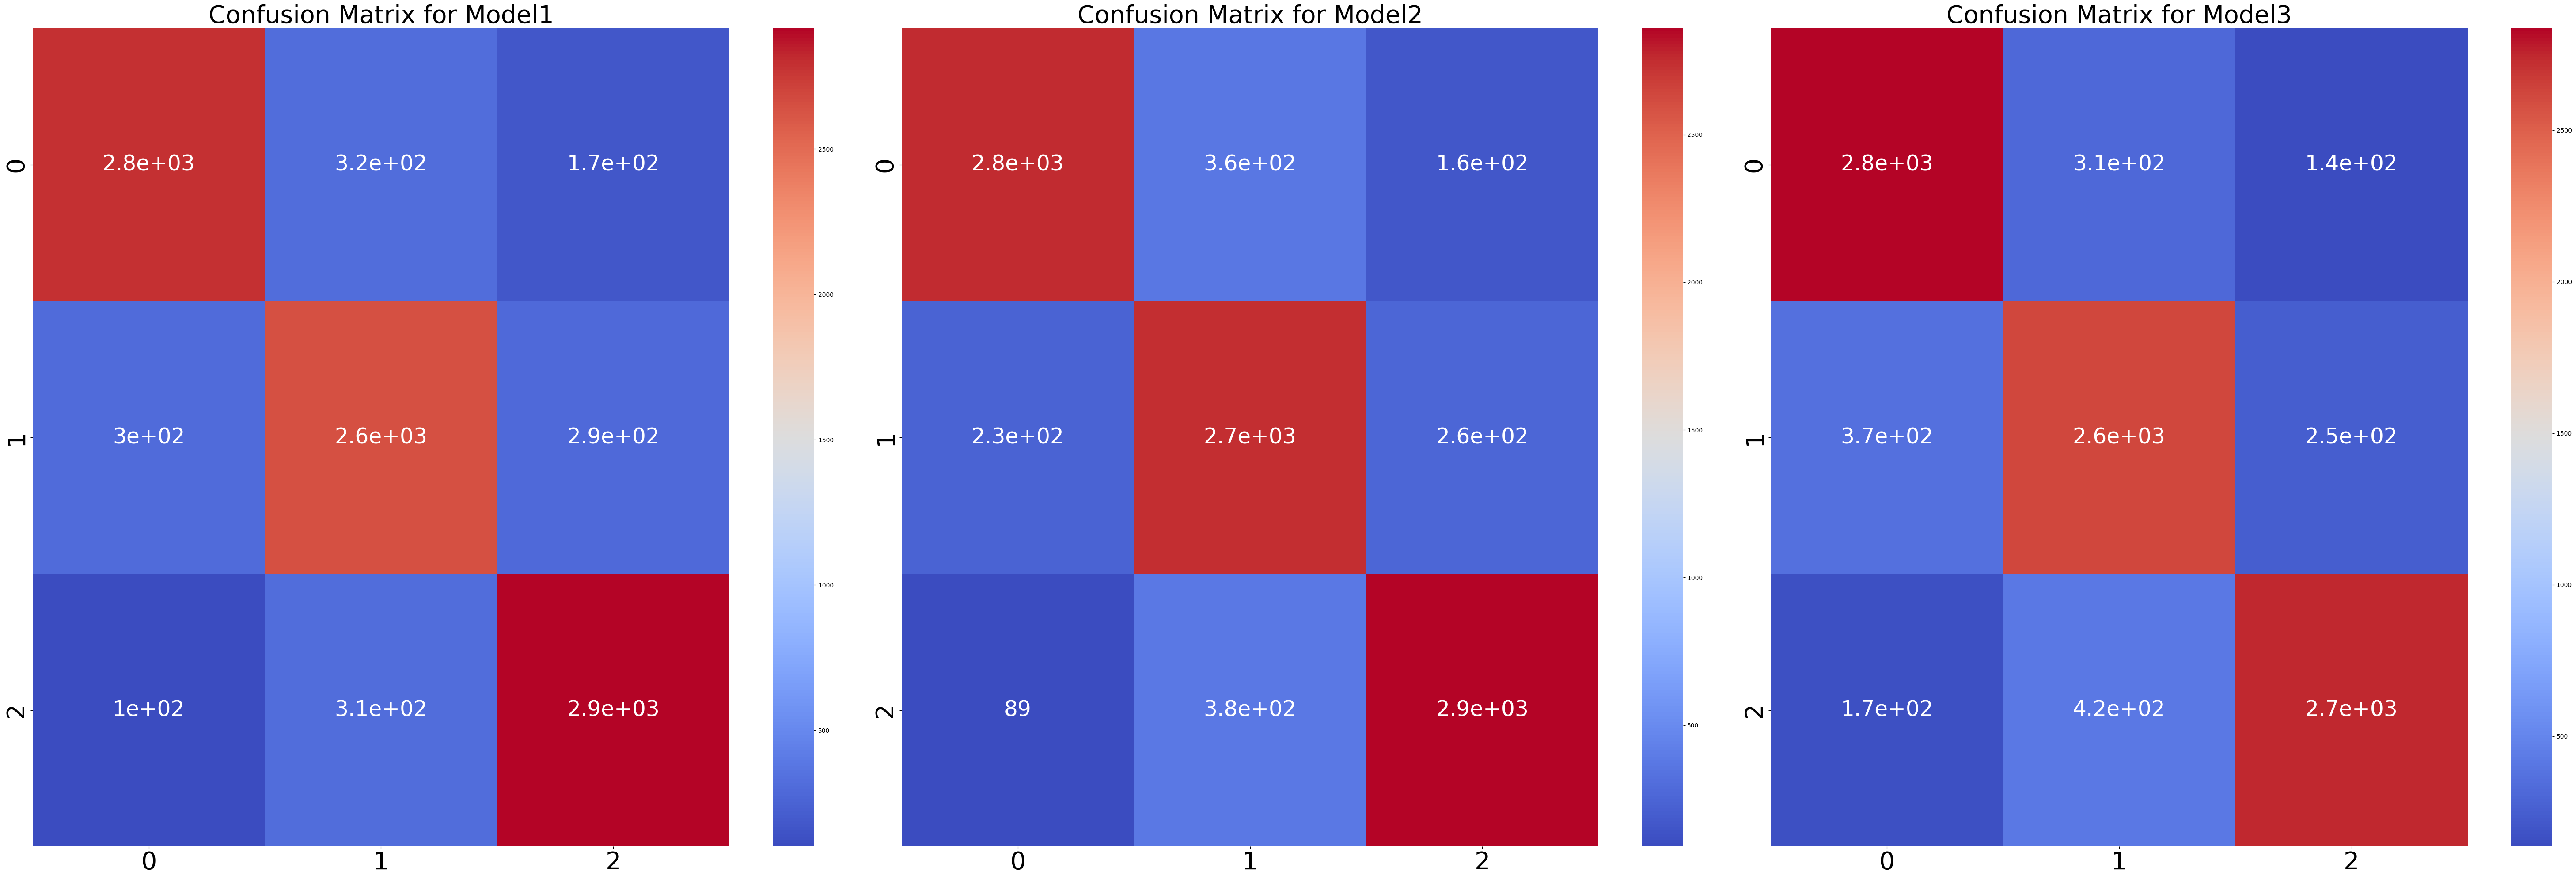

In [ ]:
## Confusion matrices for all 3 models
cm1=confusion_matrix(val_data['similarity'],sim1)
cm2=confusion_matrix(val_data['similarity'],sim2)
cm3=confusion_matrix(val_data['similarity'],sim3)
fig,axes=plt.subplots(1,3,figsize=(60,20))
sns.heatmap(cm1,annot=True,annot_kws={'size':35},cmap='coolwarm',ax=axes[0])
axes[0].set_title('Confusion Matrix for Model1',fontsize=40)
axes[0].tick_params(axis='both',labelsize=40)
sns.heatmap(cm2,annot=True,annot_kws={'size':35},cmap='coolwarm',ax=axes[1])
axes[1].set_title('Confusion Matrix for Model2',fontsize=40)
axes[1].tick_params(axis='both',labelsize=40)
plt.tick_params(axis='both',labelsize=40)
sns.heatmap(cm3,annot=True,annot_kws={'size':35},cmap='coolwarm',ax=axes[2])
axes[2].set_title('Confusion Matrix for Model3',fontsize=40)
axes[2].tick_params(axis='both',labelsize=40)
plt.tight_layout()
plt.show()